In [4]:
import pandas as pd
from datetime import datetime
import pyflux as pf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-24l673jz
  Running command git clone -q https://github.com/RJT1990/pyflux /tmp/pip-req-build-24l673jz
  Created wheel for pyflux: filename=pyflux-0.4.17-cp37-cp37m-linux_x86_64.whl size=5242003 sha256=699de6010893f79b2330d8356df6e0900676a5f18ed94779e5ef693855064edb
  Stored in directory: /tmp/pip-ephem-wheel-cache-ax5nxdgg/wheels/96/8f/9c/4523f6aab114103428254ec8f7260d52bffaa1ea1add77a487
Successfully built pyflux


In [5]:
from google.colab import files
uploaded = files.upload()
data_train_a = pd.read_csv('cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv('cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True)
data_train_a.head()

Saving cpu-test-a.csv to cpu-test-a.csv
Saving cpu-train-a.csv to cpu-train-a.csv


,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


Text(0.5, 1.0, 'CPU Utilization')

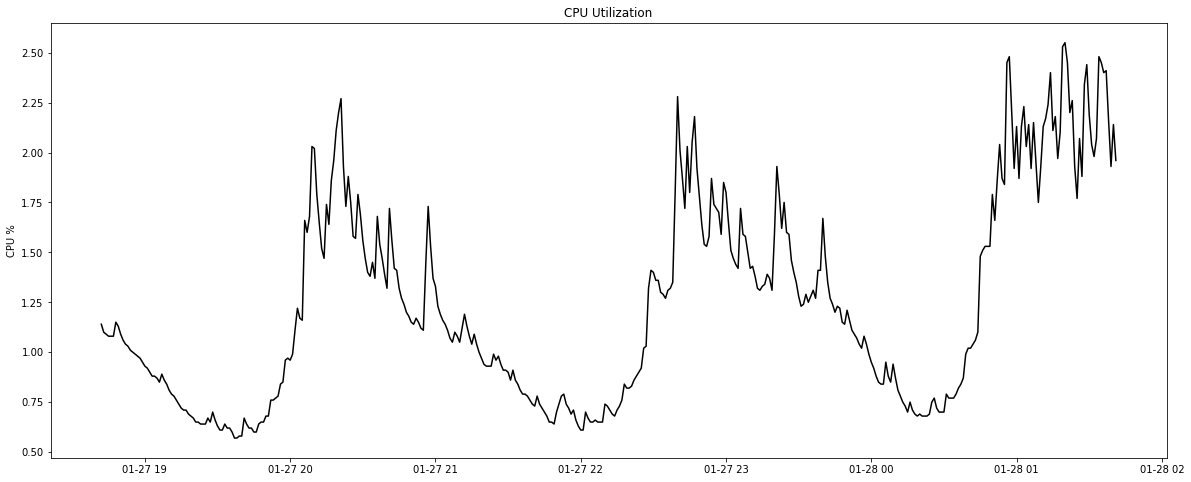

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')


In [7]:
model_a = pf.ARIMA(data=data_train_a, ar=11, ma=11, integ=0, target='cpu')
x = model_a.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.02555
Acceptance rate of Metropolis-Hastings is 0.1325
Acceptance rate of Metropolis-Hastings is 0.31695

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.19035
Acceptance rate of Metropolis-Hastings is 0.31975


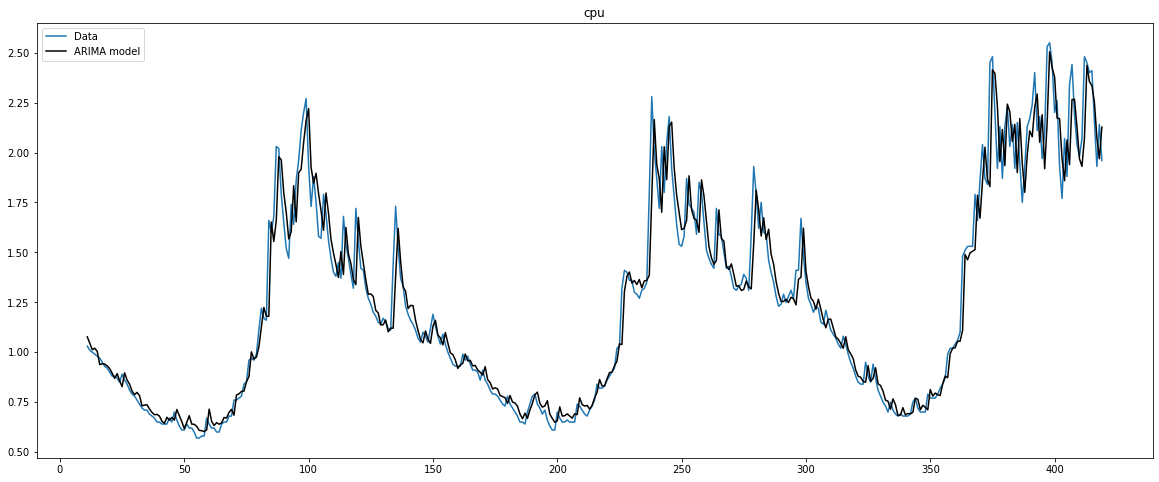

In [8]:
model_a.plot_fit(figsize=(20,8))

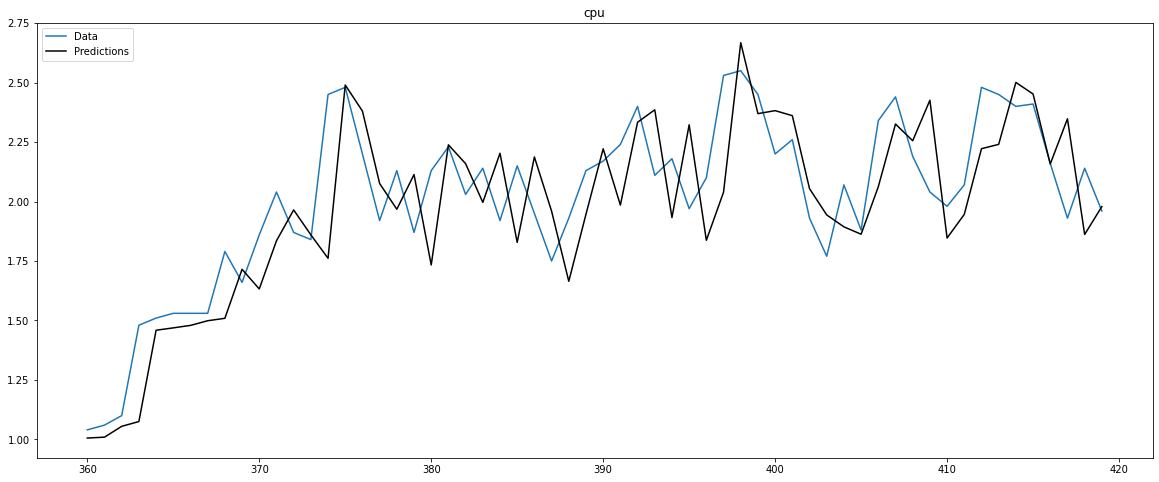

In [9]:
model_a.plot_predict_is(h=60, figsize=(20,8))

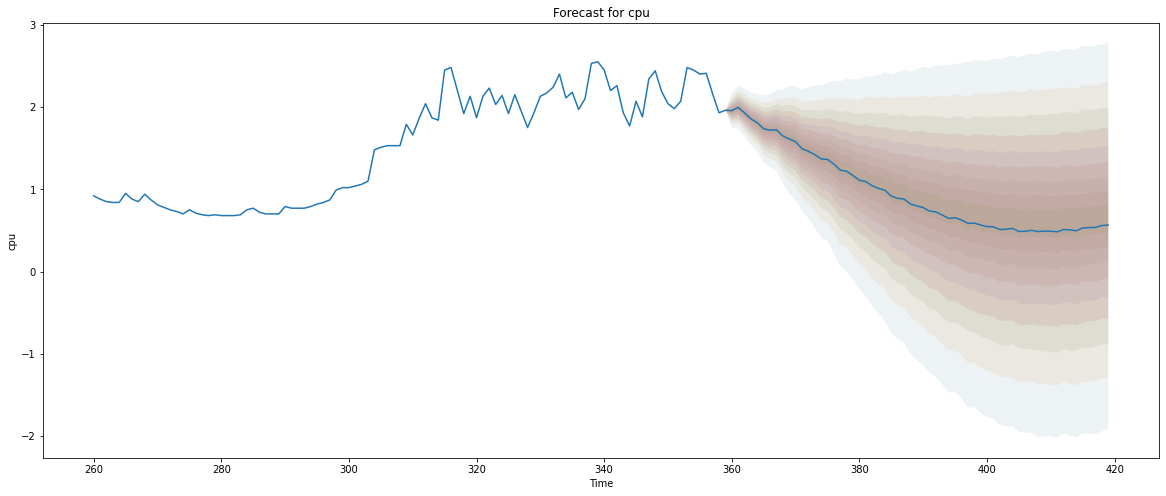

In [10]:
model_a.plot_predict(h=60,past_values=100,figsize=(20,8))